# Using yfinance

The provided code imports necessary libraries, including yfinance for fetching financial data, pandas for data manipulation, and matplotlib.pyplot for plotting. It retrieves historical foreign exchange data for the USD/PLN (U.S. Dollar to Polish Zloty) currency pair over the past year at monthly intervals, resets the index for better display, and renames the columns for clarity. The code then creates a plot with dual axes, where the primary axis shows the closing prices of the exchange rate plotted against the date, labeled appropriately in blue. A secondary y-axis is added for potential additional data, such as volume, although volume data is not included in this implementation. The plot is titled "USD to PLN Exchange Rate (Last 1 Year)", includes a grid for better readability, and rotates the x-ticks for visibility. Finally, the plot is displayed using plt.show(), providing a clear visual representation of exchange rate trends over the specified period.

[*********************100%%**********************]  1 of 1 completed


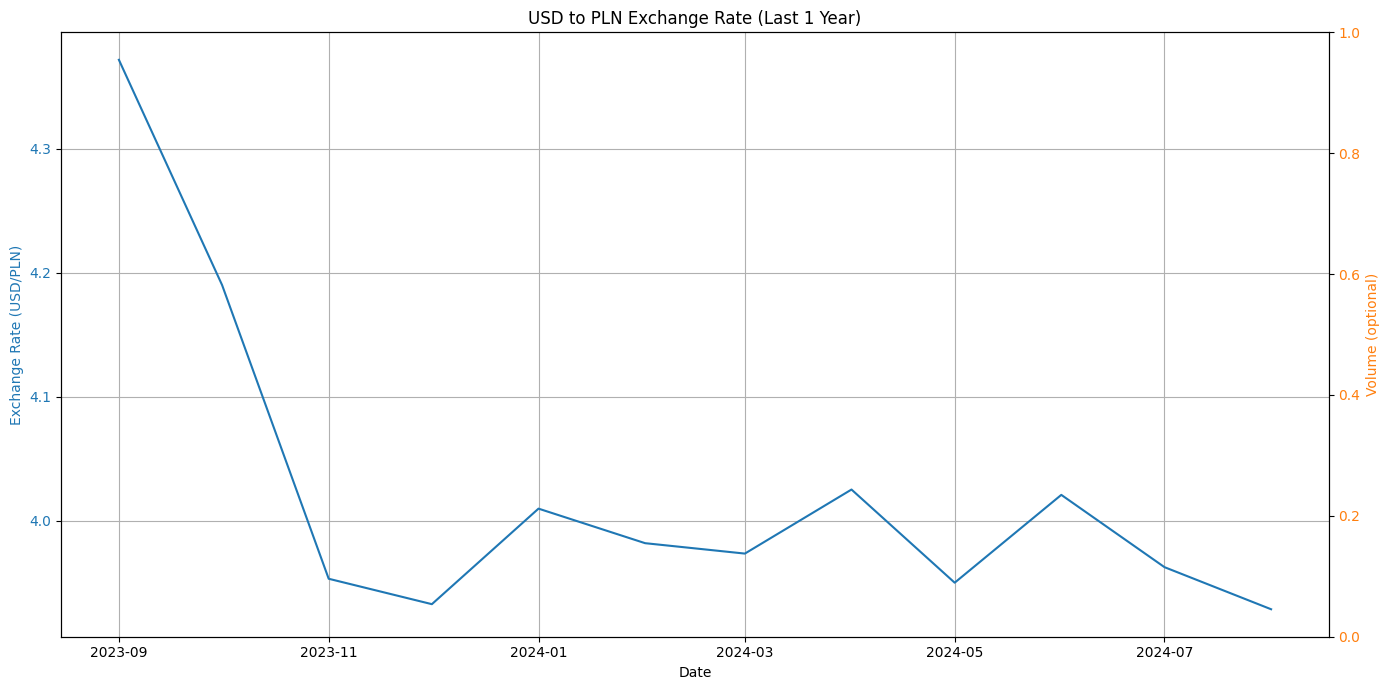

In [4]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Fetch FX Data for USD/PLN for the last 1 year with a monthly interval
currency_pair = 'USDPLN=X'
fx_data = yf.download(currency_pair, period="1y", interval="1mo")

# Step 2: Reset index for better display
fx_data.reset_index(inplace=True)
fx_data.columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']  # Rename columns

# Step 3: Plotting the USD/PLN Exchange Rate on Dual Axes
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plotting the closing price on the primary y-axis
ax1.plot(fx_data['Date'], fx_data['Close'], color='tab:blue', label='USD/PLN Exchange Rate')
ax1.set_xlabel('Date')
ax1.set_ylabel('Exchange Rate (USD/PLN)', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Adding a secondary y-axis for additional data (if needed)
ax2 = ax1.twinx()
ax2.set_ylabel('Volume (optional)', color='tab:orange')  # Placeholder for secondary data
ax2.tick_params(axis='y', labelcolor='tab:orange')

# Title and grid
plt.title('USD to PLN Exchange Rate (Last 1 Year)')
ax1.grid()
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

# Data Transformation

After resetting the index for better display and renaming the columns for clarity, the code performs several time series transformations on the closing prices of the exchange rate. These transformations include calculating the logarithm of the closing prices, computing the first and second differences, calculating the percentage change, and determining the 3-month rolling mean and standard deviation. The transformed data is organized into a dictionary for easy access, and the code then creates subplots for each transformation, plotting them in a single figure with appropriate titles, labels, and legends. Finally, it adjusts the layout for clarity and displays the plots, providing a comprehensive visual analysis of the various transformations applied to the exchange rate data.

[*********************100%%**********************]  1 of 1 completed


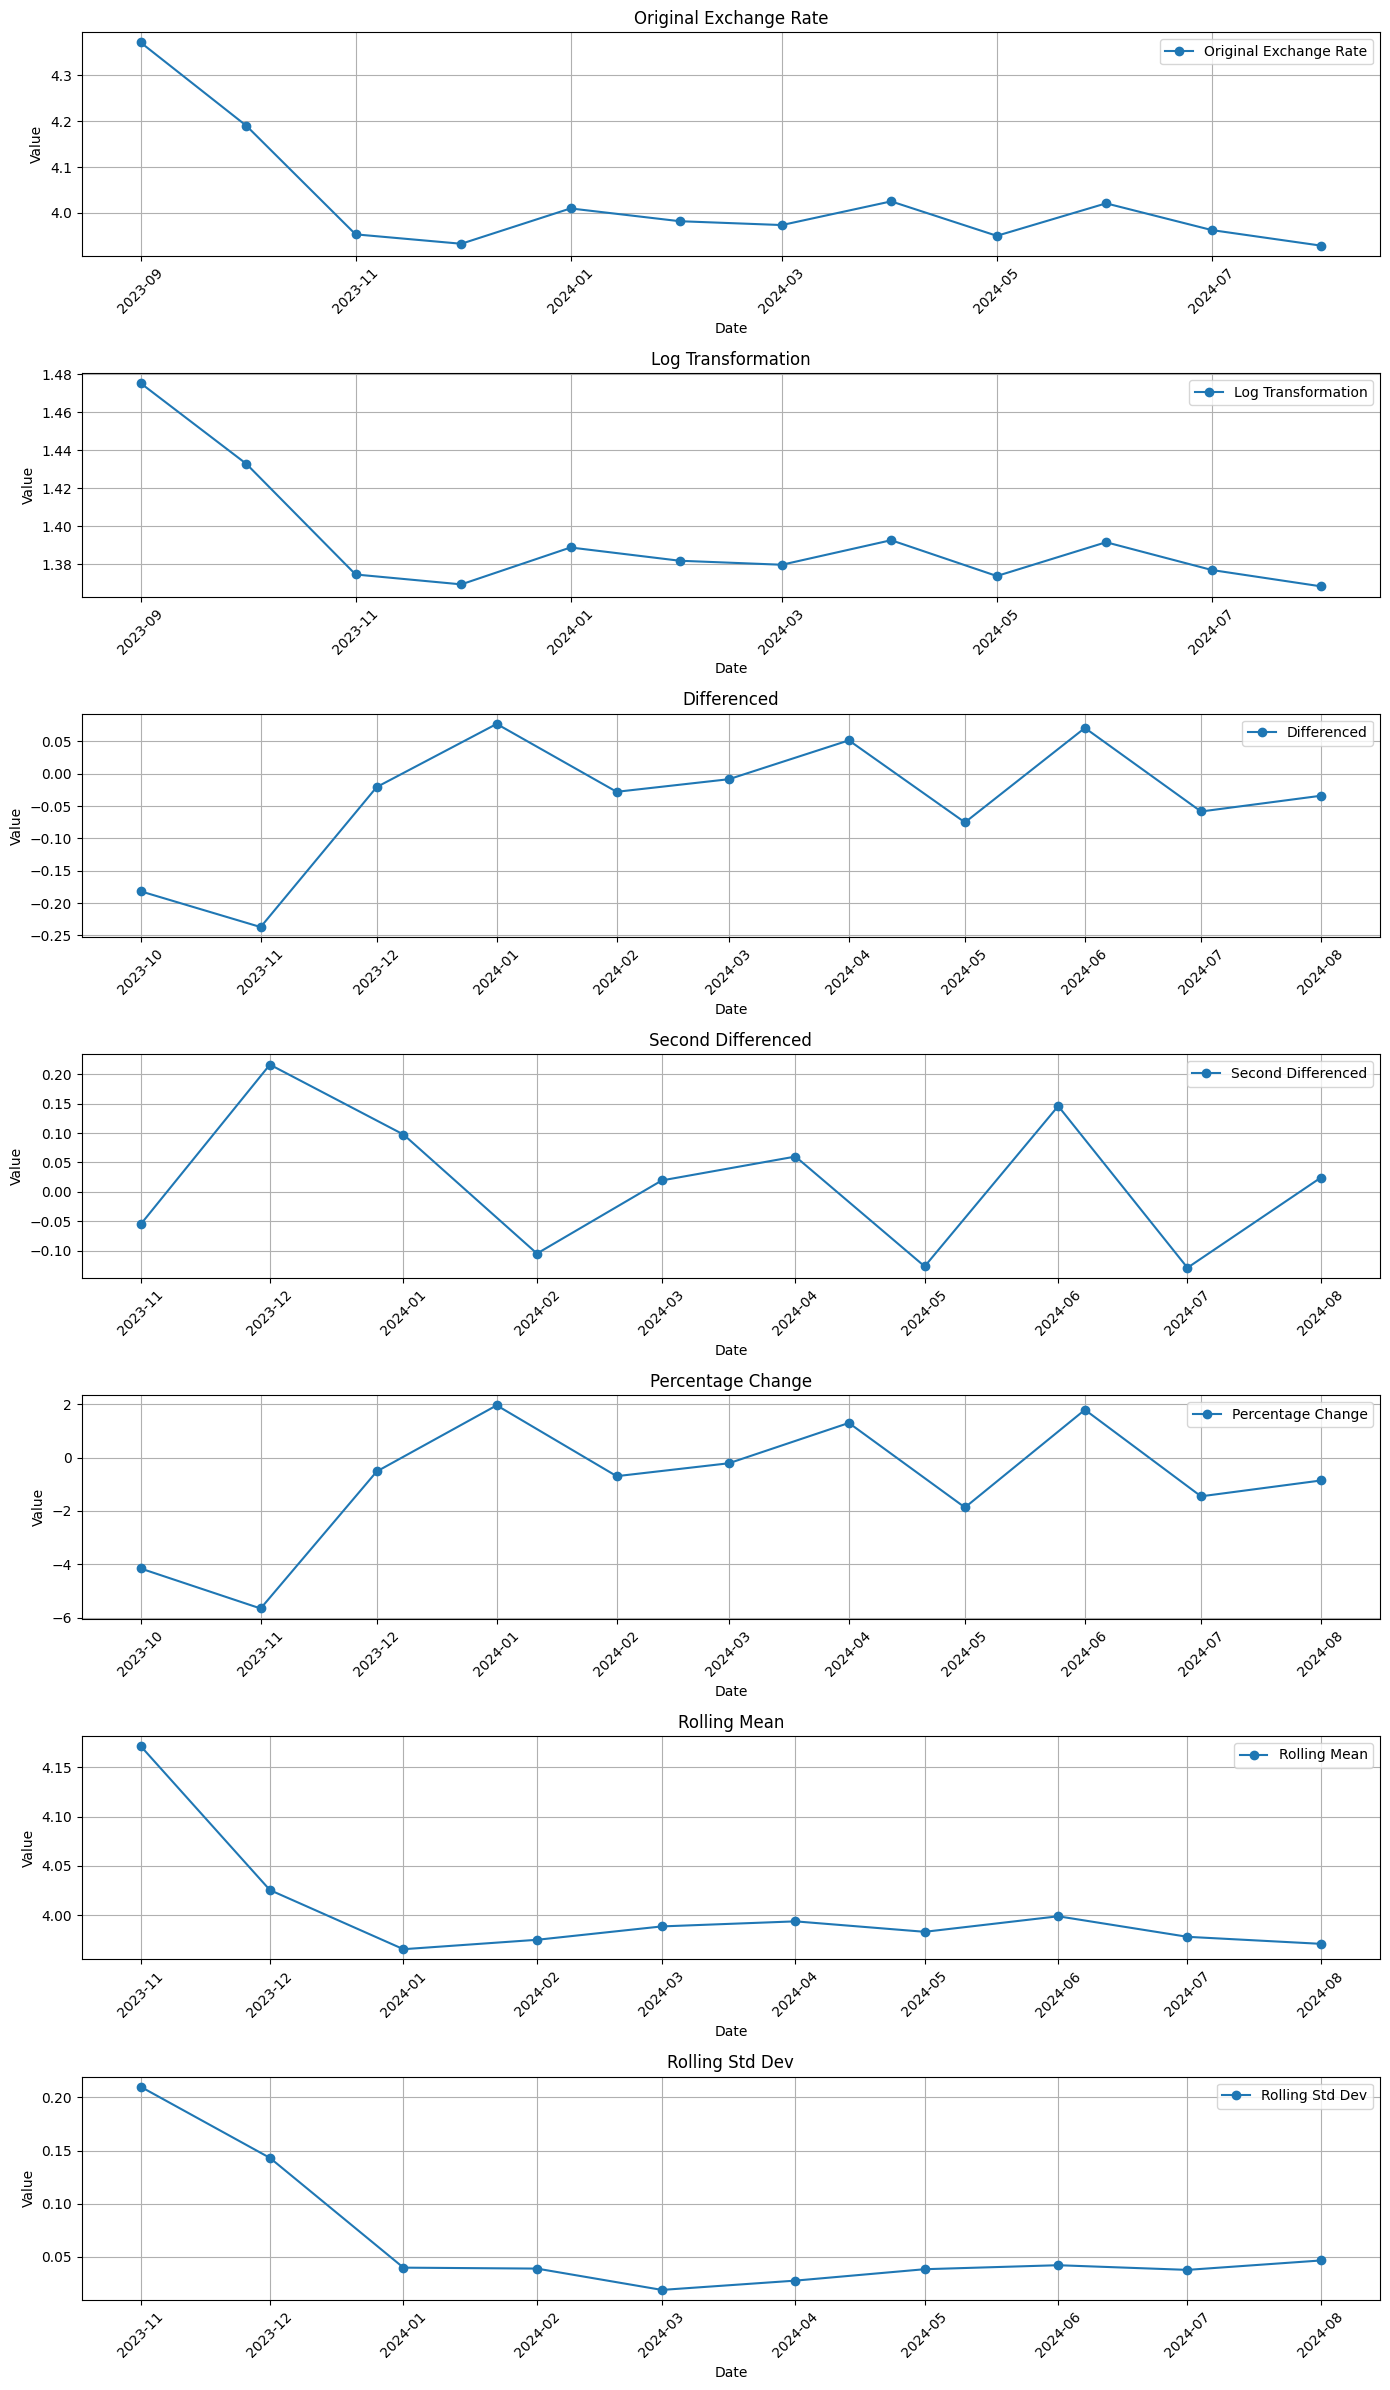

In [7]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Fetch FX Data for USD/PLN for the last 1 year with a monthly interval
currency_pair = 'USDPLN=X'
fx_data = yf.download(currency_pair, period="1y", interval="1mo")

# Step 2: Reset index for better display
fx_data.reset_index(inplace=True)
fx_data.columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']  # Rename columns

# Step 3: Create Time Series Transformations
fx_data['Log'] = np.log(fx_data['Close'])
fx_data['Differenced'] = fx_data['Close'].diff()
fx_data['Second_Differenced'] = fx_data['Differenced'].diff()  # Second differencing
fx_data['Pct_Change'] = fx_data['Close'].pct_change() * 100  # Percentage change
fx_data['Rolling_Mean'] = fx_data['Close'].rolling(window=3).mean()  # 3-month rolling mean
fx_data['Rolling_Std'] = fx_data['Close'].rolling(window=3).std()  # 3-month rolling std dev

# Step 4: Plotting each transformation
transformations = {
    'Original Exchange Rate': fx_data['Close'],
    'Log Transformation': fx_data['Log'],
    'Differenced': fx_data['Differenced'],
    'Second Differenced': fx_data['Second_Differenced'],
    'Percentage Change': fx_data['Pct_Change'],
    'Rolling Mean': fx_data['Rolling_Mean'],
    'Rolling Std Dev': fx_data['Rolling_Std']
}

# Creating subplots for each transformation
plt.figure(figsize=(14, 24))

for i, (title, data) in enumerate(transformations.items(), start=1):
    plt.subplot(len(transformations), 1, i)
    plt.plot(fx_data['Date'], data, marker='o', label=title)
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.grid()
    plt.xticks(rotation=45)
    plt.legend()

plt.tight_layout()
plt.show()